# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [6]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [7]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

Compute frequencies by status

In [8]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,250
Treatment,148


col_0,Frequency
status,
Control,0.628141
Treatment,0.371859


<font size = "5">

Query with string conditions

In [11]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
392,27.0,4,151,90,2950,17.3,C-1694092,Control
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control


<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [46]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,23.656552,5.558621,194.965517,2999.124138,15.622069
std,8.487383,1.735559,103.989477,862.268865,2.806626
min,9.000000,4.000000,68.000000,1760.000000,9.500000
25%,17.000000,4.000000,98.000000,2200.000000,13.900000
50%,22.000000,4.000000,144.000000,2910.000000,15.000000
75%,29.900000,8.000000,302.000000,3672.000000,17.300000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,23.433202,5.395257,192.545455,2953.976285,15.537154
std,7.420168,1.681451,104.624019,839.151120,2.734372
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,2245.000000,13.800000
50%,23.000000,4.000000,151.000000,2735.000000,15.500000
75%,28.800000,6.000000,258.000000,3563.000000,17.000000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [12]:
def fn_grade(numeric_grade):
    if numeric_grade >= 55:
        status = "pass"
    else:
        status = "fail"
    return(status)

V4 = fn_grade(numeric_grade = 30)
V4

# or

data  = pd.DataFrame([])

data["age"]                   = [18,29,15,32,6]
data["num_underage_siblings"] = [0,0,1,1,0]
data["num_adult_siblings"]    = [1,0,0,1,0]

fn_iseligible_vote = lambda age: age >= 18
fn_istwenties      = lambda age: (age >= 20) & (age < 30)
fn_sum             = lambda x,y: x + y

def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)

data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
data["in_twenties"] = data["age"].apply(fn_istwenties)
data["age_bracket"] = data["age"].apply(fn_agebracket)


# The following code also works:
# data["can_vote"]    = data["age"].apply(lambda age: age >= 18)
# data["in_twenties"] = data["age"].apply(lambda age: (age >= 20) & (age < 30))

display(data)

str

<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [14]:
#weight_mean = sum(carfeatures["weight"])/len(carfeatures["weight"])
#data_weight_cylinders = carfeatures.query("(weight < @weight_mean) and (cylinders == 8)")

weight_median = carfeatures["weight"].median()
data_weight_cylinders1 = carfeatures.query("(weight > @weight_median) and (cylinders == 8)")
data_weight_cylinders1

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
291,19.2,8,267,125,3605,15.0,C-1692981,Treatment
292,18.5,8,360,150,3940,13.0,C-1692992,Control
298,23.0,8,350,125,3900,17.4,C-1693058,Control
300,23.9,8,260,90,3420,22.2,O-1693080,Treatment


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [ ]:
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
display(carsorted)

display(carsorted.iloc[0,:])
display(carsorted.iloc[[0,1,2],:])

# Extract rows 0 to 5
display(carfeatures.iloc[0:5,:])

# Extract rows 8 onwards
display(carfeatures.iloc[ 8:, : ])

#
weight_sorted = carfeatures.sort_values(by = "weight", ascending = True)
display(weight_sorted.iloc[0:1, :])

<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [ ]:
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [ ]:
def fn_e(y,x,b0,b1):
    V = y*(1 + x/b0)**(b0*b1)
    return(V)

V1 = fn_compute_value(P = 1000, r = 0.01, n = 20, t=10)
V2 = fn_compute_value(P = 10, r = 0.01, n = 20, t=10)

print(V1)
print(V2)

np.mean(vec_f)
np.std(vec_f)
np.min(vec_f)
np.median(vec_f)
np.max(vec_f)

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

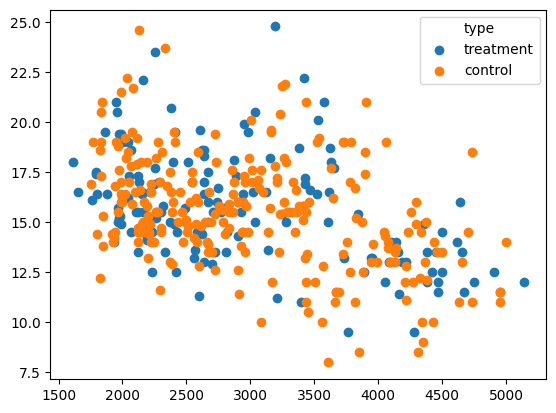

In [16]:
data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

plt.scatter(x = data_treated["weight"],y = data_treated["acceleration"])
plt.scatter(x = data_control["weight"],y = data_control["acceleration"])
plt.legend(labels = ["treatment","control"],
           title  = "type")

plt.show()
